<a href="https://colab.research.google.com/github/PranshuB7/Walmart-Sales-Analysis-EDA/blob/main/python_proect_walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Walmart_Sales.csv to Walmart_Sales.csv


In [5]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv('Walmart_Sales.csv')

# Show the first 5 rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Shape of the dataset (rows, columns)
df.shape

# Column names
df.columns

# Check data types
df.dtypes

# Summary statistics (mean, min, max etc.)
df.describe()

# Check if there are missing values
df.isnull().sum()


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# DATA CLEANING----


df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract additional features
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

# Check and fill/remove nulls (if any)
df.dropna(inplace=True)


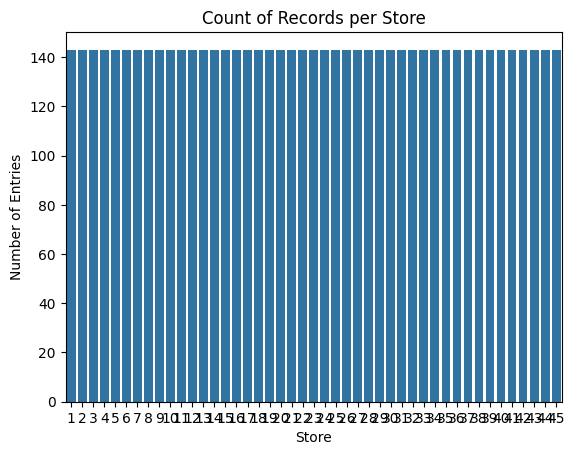

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Store')
plt.title("Count of Records per Store")
plt.xlabel("Store")
plt.ylabel("Number of Entries")
plt.show()



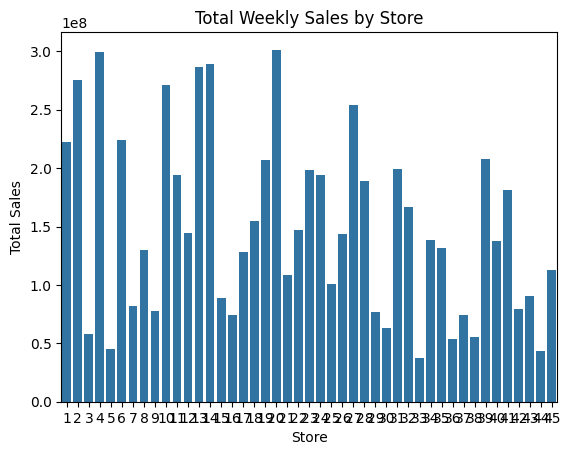

In [ ]:
sales_per_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

sns.barplot(data=sales_per_store, x='Store', y='Weekly_Sales')
plt.title("Total Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

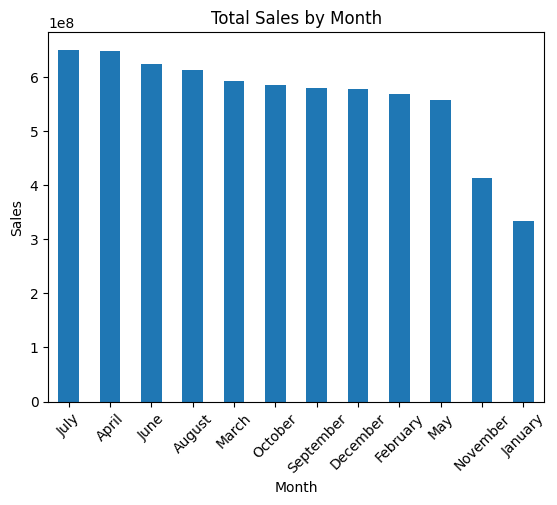

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Sales by Month")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


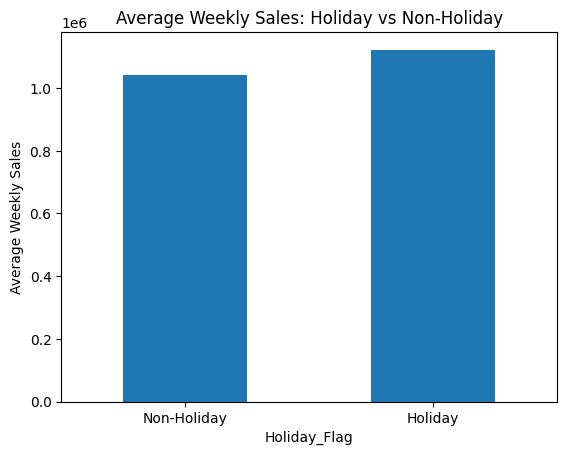

In [ ]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean().plot(kind='bar')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.ylabel("Average Weekly Sales")
plt.show()


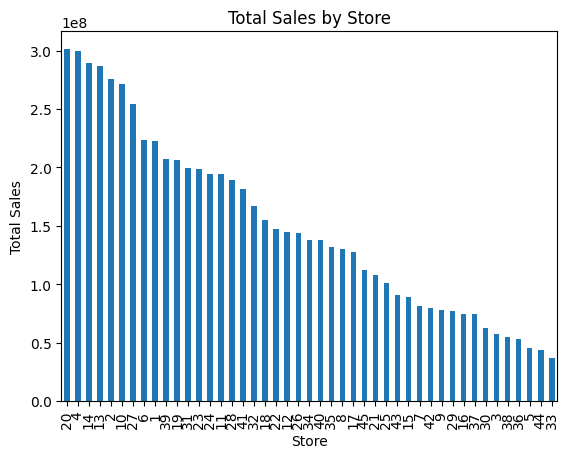

In [ ]:
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()


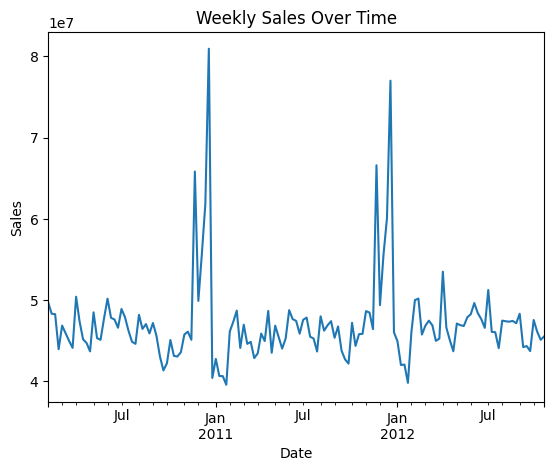

In [ ]:
df_sorted = df.sort_values('Date')
df_sorted.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


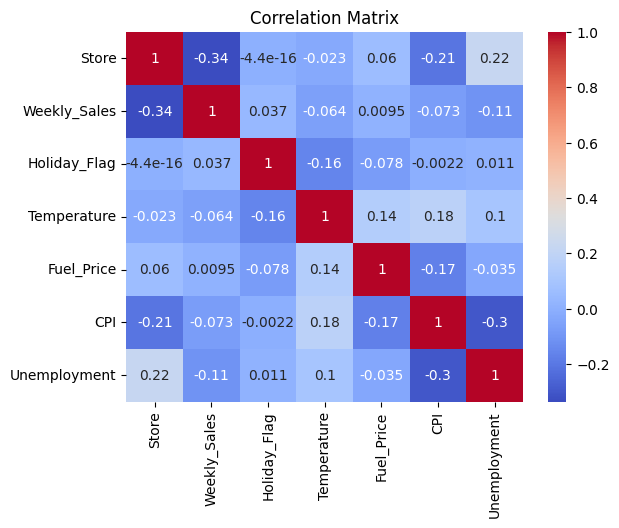

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
